# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
df_cancer = datasets.load_breast_cancer()

In [6]:
df_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [11]:
df['Result'] = cancer.target

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Use scatter plots to look at the data (use different colors for the classes)

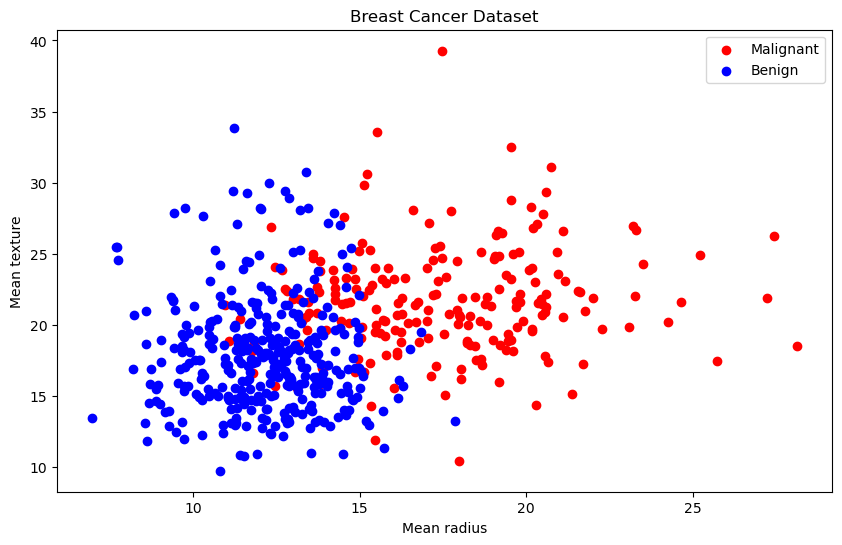

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df[df.Result==0]['mean radius'], df[df.Result==0]['mean texture'], color='red', label='Malignant')
plt.scatter(df[df.Result==1]['mean radius'], df[df.Result==1]['mean texture'], color='blue', label='Benign')
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.title('Breast Cancer Dataset')
plt.legend()
plt.show()

- Malignant Tumors are mostly bigger in size than the Benign Tumors

### Use box plots to look at the data

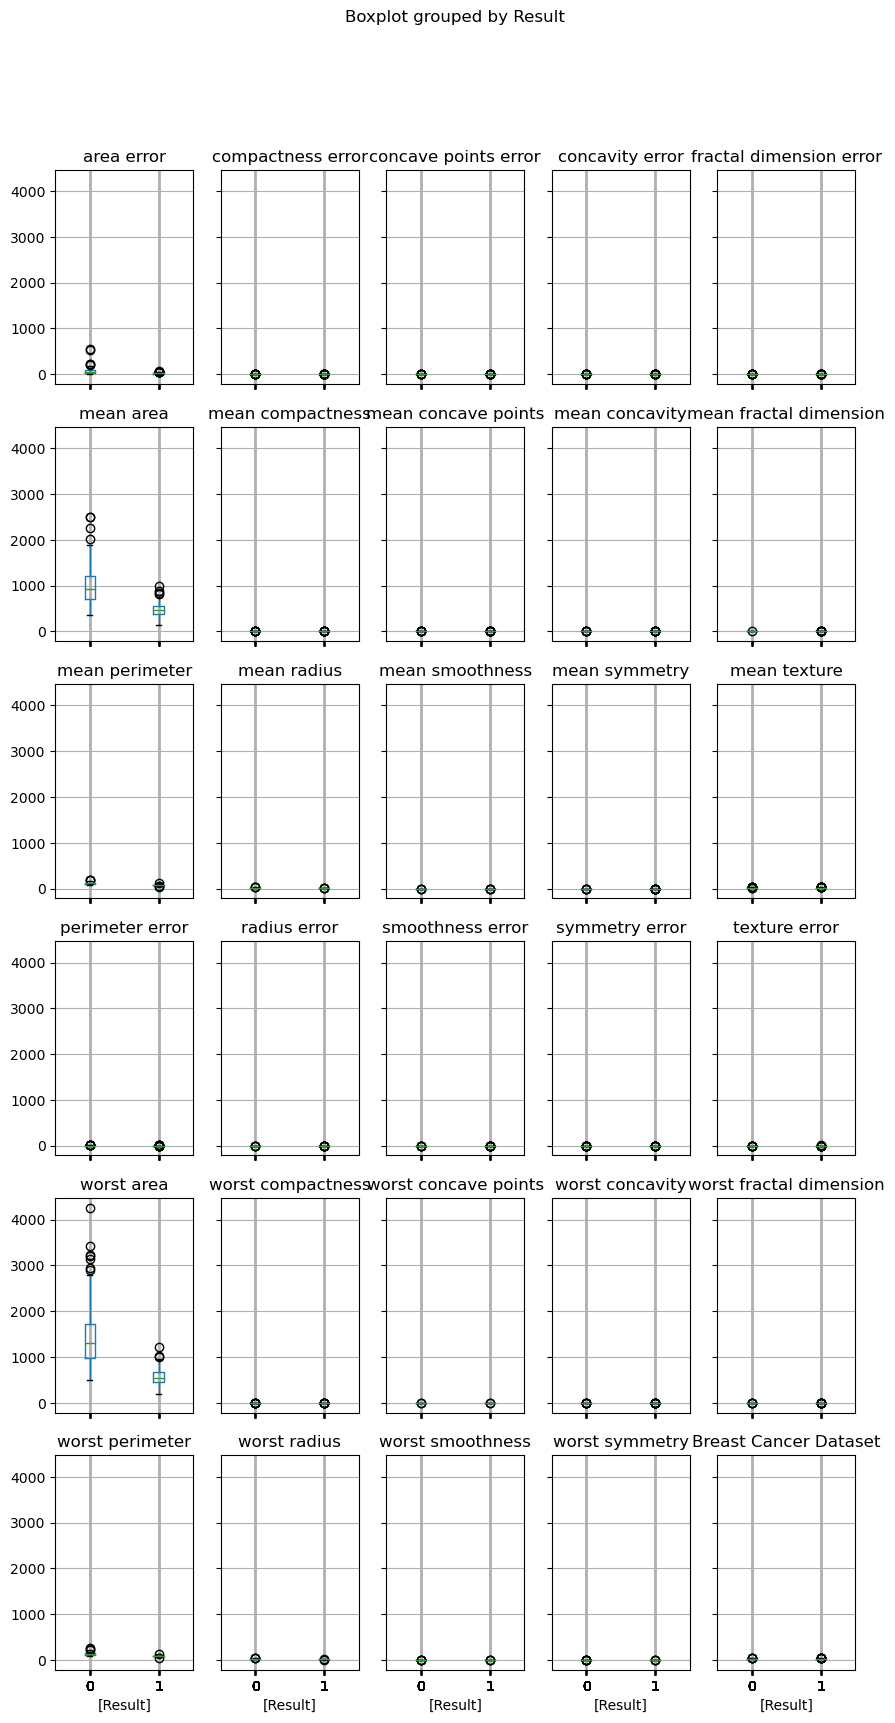

In [19]:
df.boxplot(by='Result', figsize=(10,20))
plt.title('Breast Cancer Dataset')
plt.show()

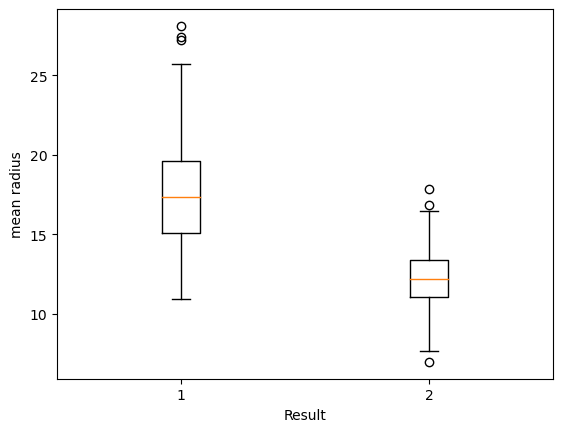

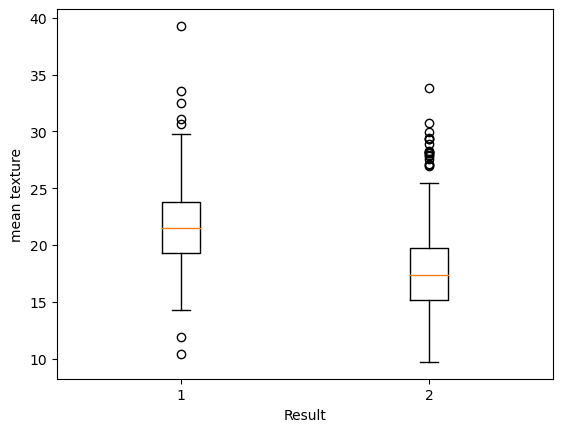

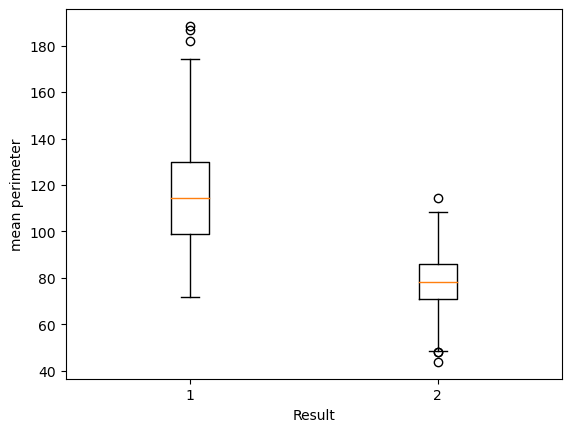

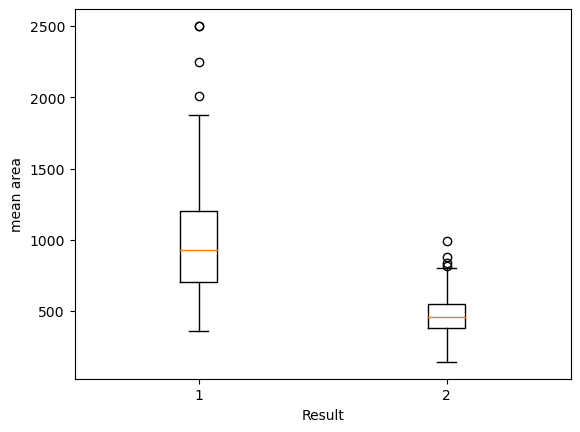

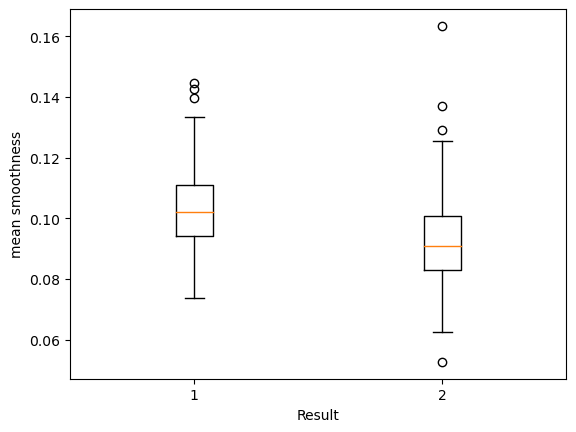

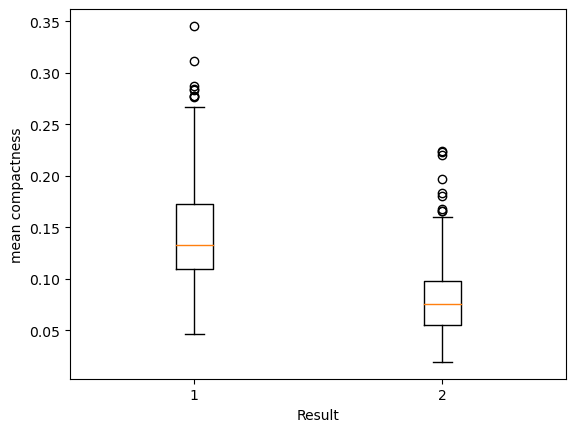

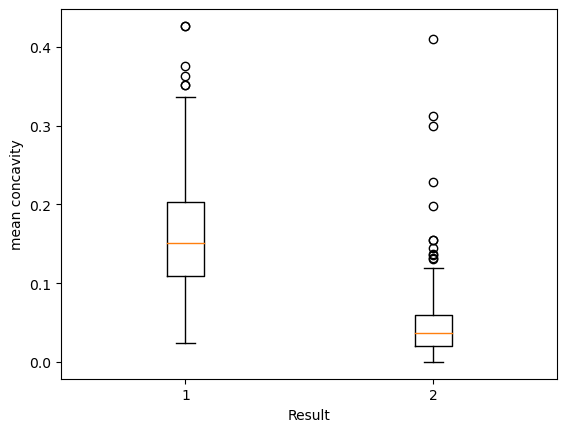

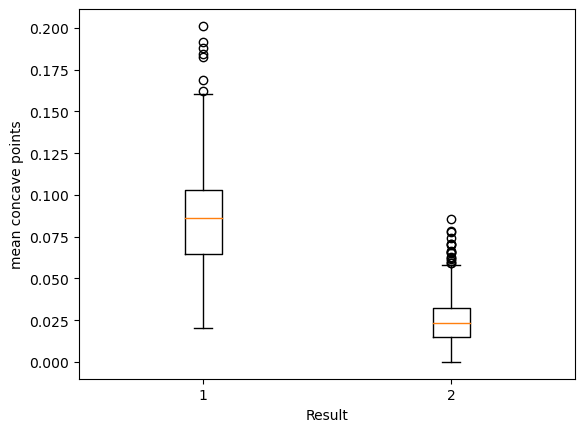

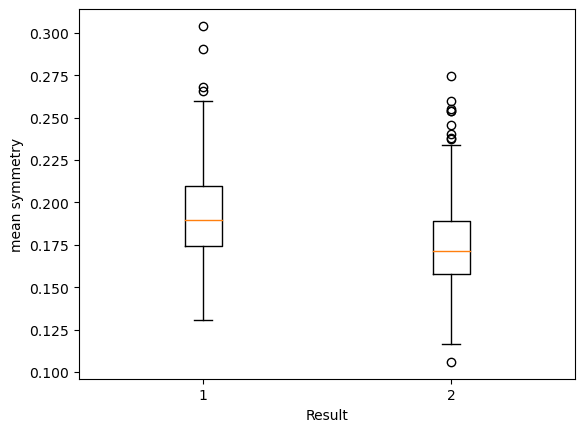

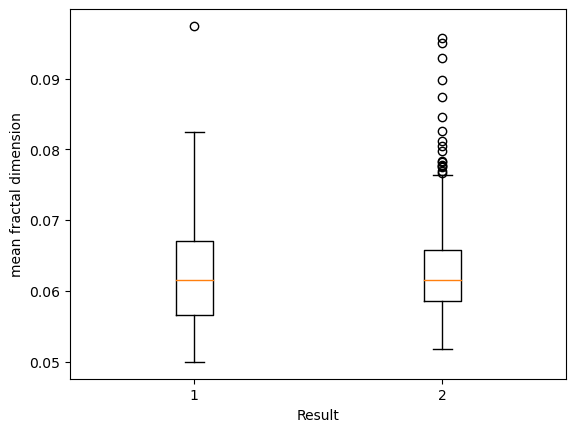

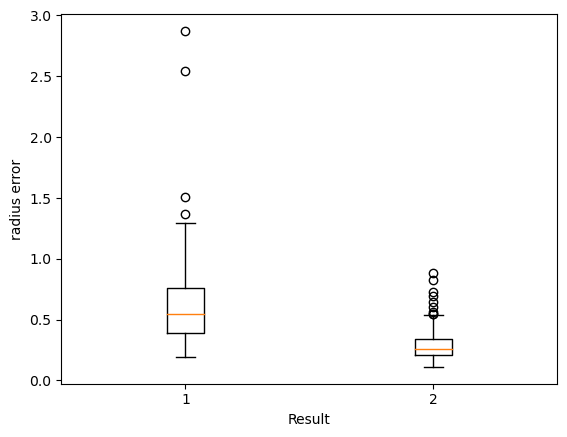

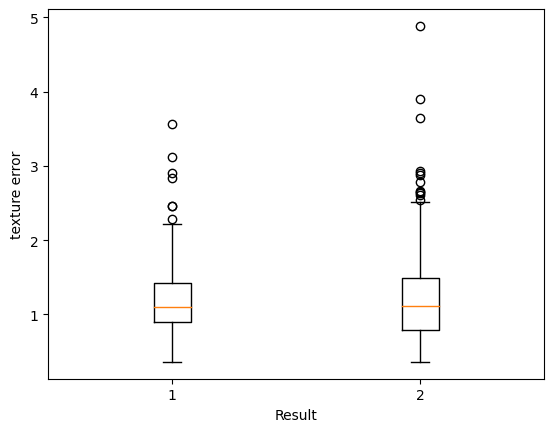

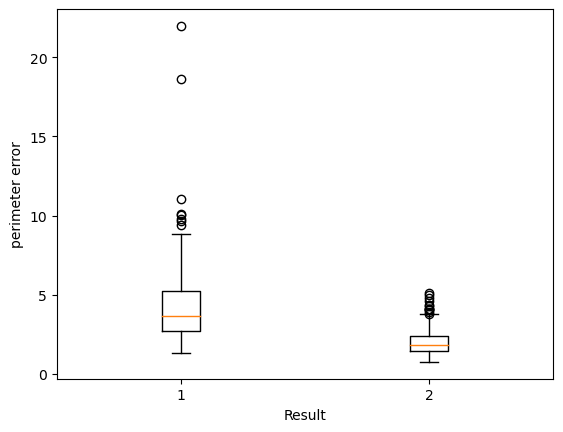

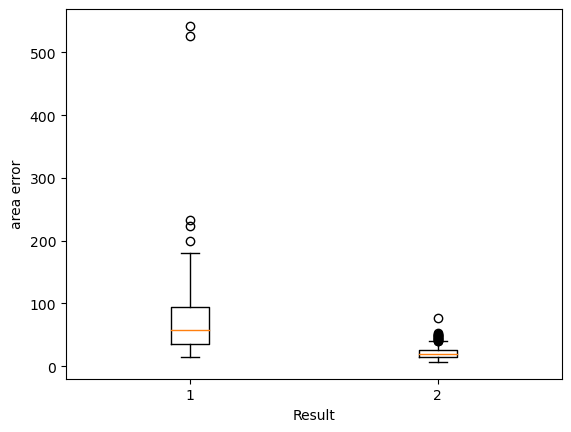

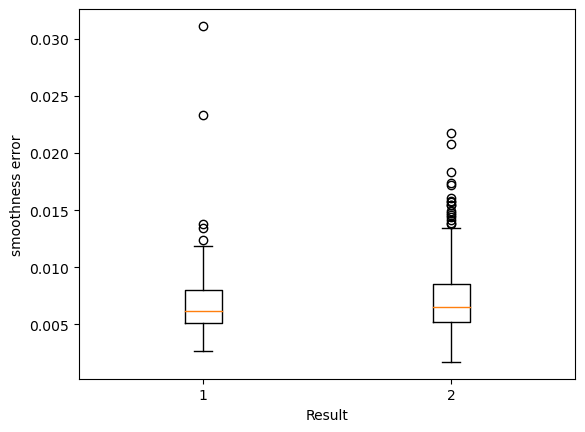

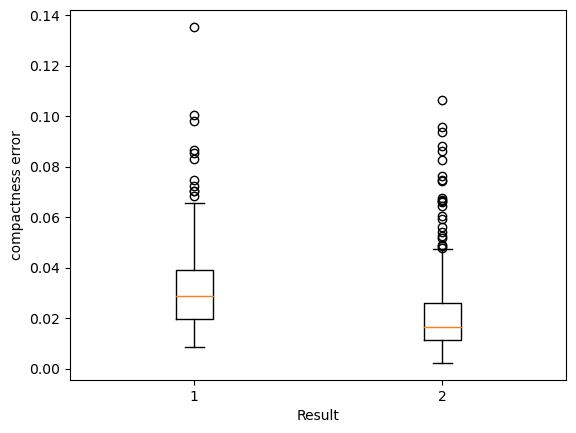

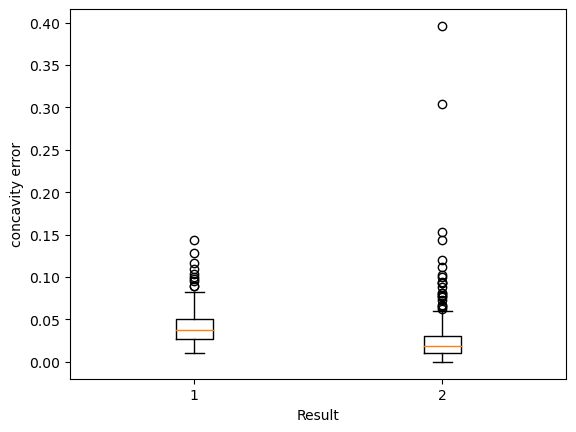

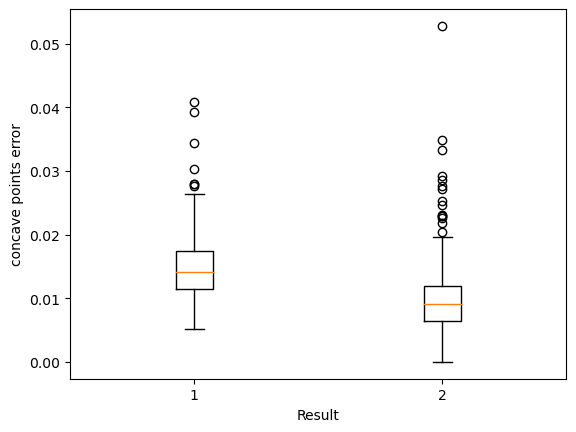

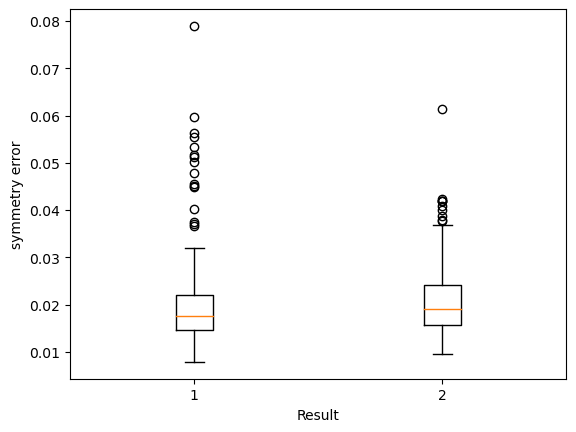

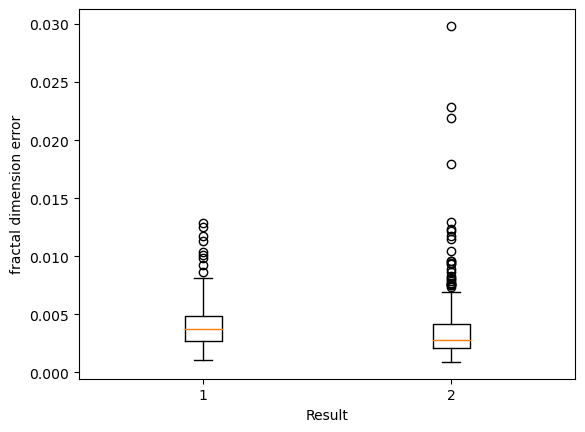

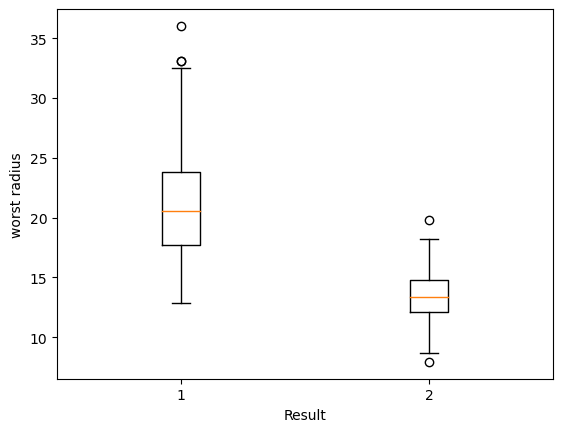

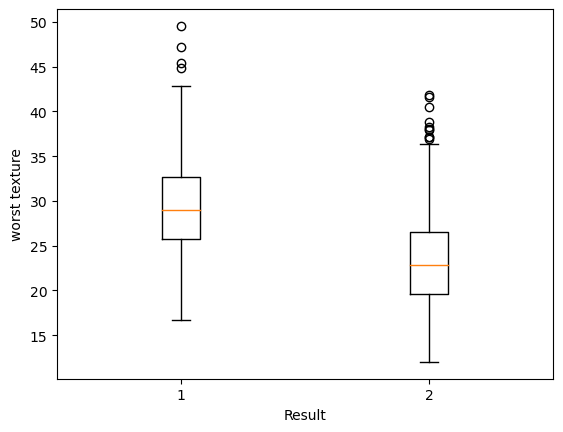

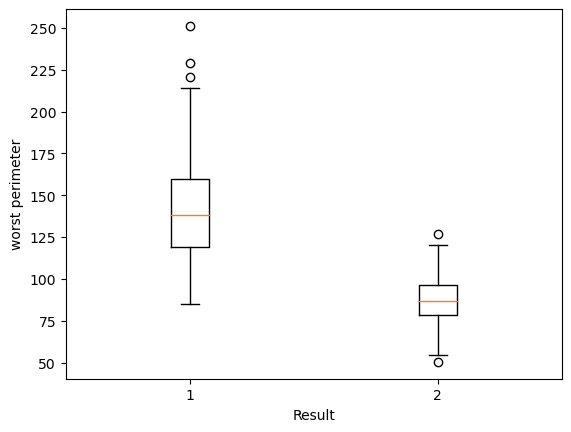

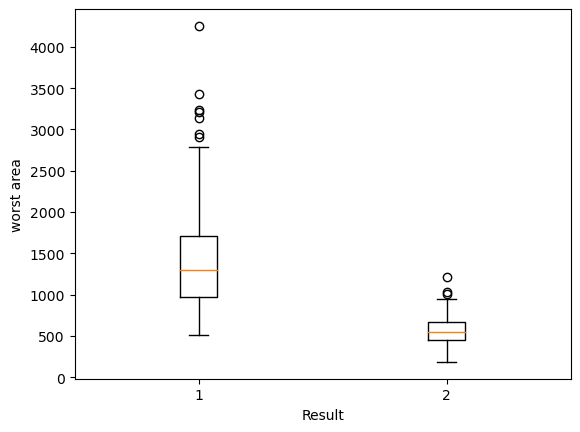

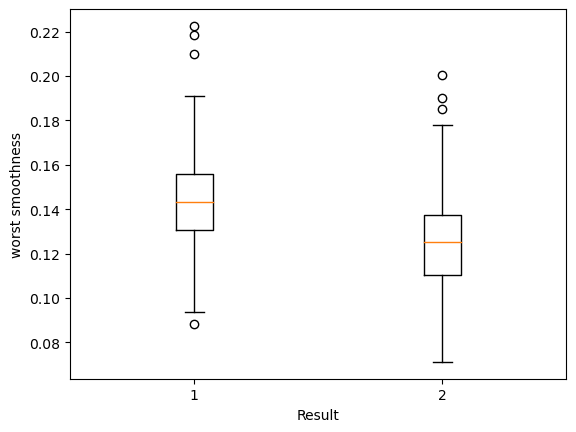

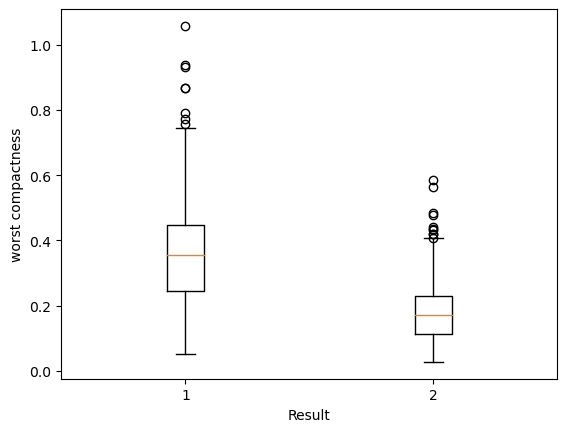

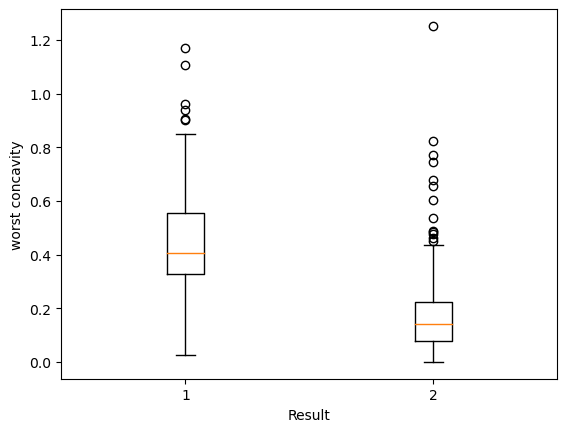

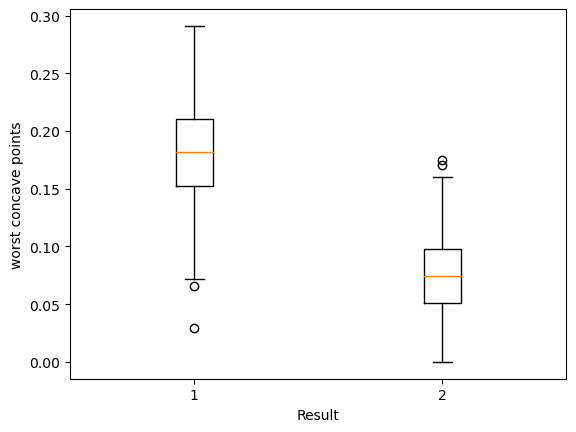

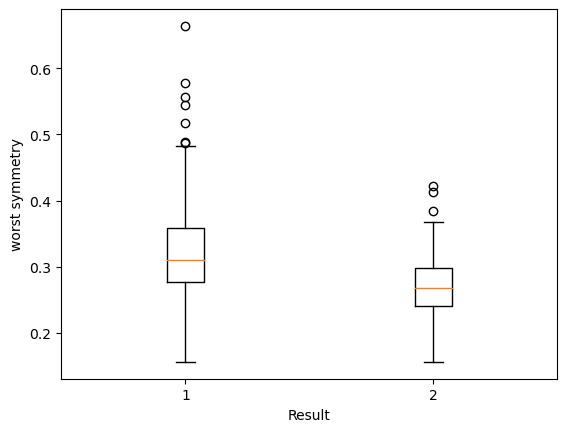

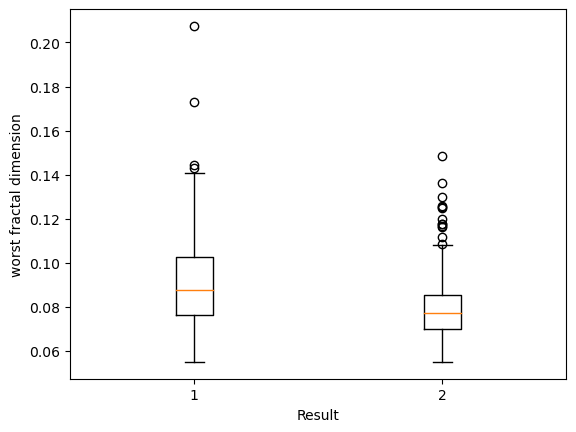

In [22]:
for feature in df_cancer.feature_names:
    plt.boxplot([df[df['Result'] == 0][feature], df[df['Result'] == 1][feature]])
    plt.xlabel('Result')
    plt.ylabel(feature)
    plt.show()

### create a training and test set with random_state = 3

In [23]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'Result']

X = df[features]
y = df['Result']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')

Records in training data: 455
Records in test data: 114


### train a decision tree model on the training set.

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [31]:
from sklearn.metrics import accuracy_score
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
print('Decision Tree Accuracy:', dtc_acc)

Decision Tree Accuracy: 0.8947368421052632


### train a logistic regression model on the training set

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=3)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy:', lr_acc)

Logistic Regression Accuracy: 0.9122807017543859


C:\Users\Wihar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### train a random forest model on the training set

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=3)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print('Random Forest Accuracy:', rfc_acc)

Random Forest Accuracy: 0.9385964912280702


### Which model performed better?

- With an accuracy of 93.8% Random Forest model performed the best
- With an accuracy of 89.47% Decision Tree Classifier has least accuracy

### Which features were most relevant in each model

In [41]:
importances = dtc.feature_importances_

for feature, importance in sorted(zip(X_train.columns, importances), key = lambda x: x[1]):
    print(feature, importance)

mean radius 0.0
mean perimeter 0.0
mean area 0.0
mean compactness 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0
perimeter error 0.0
smoothness error 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
fractal dimension error 0.0
worst radius 0.0
worst compactness 0.0
worst fractal dimension 0.0
worst texture 0.0005481293295103351
mean concavity 0.0037247000501821463
symmetry error 0.0046737611964828675
worst symmetry 0.007522529925767663
mean smoothness 0.007789601994138112
worst perimeter 0.009102728431589437
texture error 0.009157192168115948
worst smoothness 0.011509107607498096
worst concavity 0.017831114462562296
area error 0.028188808058440224
mean texture 0.03509215698359219
worst area 0.15717300153926556
worst concave points 0.7076871682528552


In [51]:
coefficients = lr.coef_
for feature, coeff in sorted(zip(X_train.columns, coefficients[0]), key = lambda x: x[1]):
    print(feature, coeff)

worst texture -0.6394183143725898
worst concavity -0.4624605997583154
worst compactness -0.36869615787972715
worst perimeter -0.27507824900006034
mean concavity -0.16318745770763274
worst symmetry -0.14261983181267446
worst concave points -0.1269390156072033
area error -0.12379638100331185
mean compactness -0.11431621758881384
mean concave points -0.06475060327591205
worst smoothness -0.04801226164319042
mean symmetry -0.04629939351022412
worst fractal dimension -0.036388976454944585
concavity error -0.03340672236433761
mean area -0.02700812137662485
mean smoothness -0.02535793312183356
compactness error -0.024081823937004754
worst area -0.01151850193254552
symmetry error -0.010753989461727747
mean fractal dimension -0.00792864805749008
concave points error -0.007633974123595818
smoothness error -0.0020639350312884764
fractal dimension error -0.001967373194362788
radius error 0.02106934392373734
perimeter error 0.04749311692827365
texture error 0.1548774479577733
mean perimeter 0.47300

### Use grid search to improve performance on the best performed model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200, 500, 750],
          'max_depth': [1, 2, 5, 10]
         }

rfm = GridSearchCV(RandomForestClassifier(), param_grid = params, cv=10,
                  scoring='accuracy')

rfm = rfm.fit(X_train, y_train)
rfm.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=500)

In [57]:
best_rfm = rfm.best_estimator_
best_rfm_pred = best_rfm.predict(X_test)
best_rfm_acc = accuracy_score(y_test, best_rfm_pred)
print('Best Random Forest Accuracy:', best_rfm_acc)

Best Random Forest Accuracy: 0.9298245614035088
